## mmdleaf
Segment a leaf from the background

# Description

In this example, a digitized text is processed to identify the letters, words and paragraphs. This demonstration uses only the mmlabel function with different connectivity parameters. 

In [1]:
import numpy as np
from PIL import Image
import ia870 as ia
import matplotlib.pyplot as plt

# Reading

The gray scale image to be processed is read. 

(-0.5, 312.5, 300.5, -0.5)

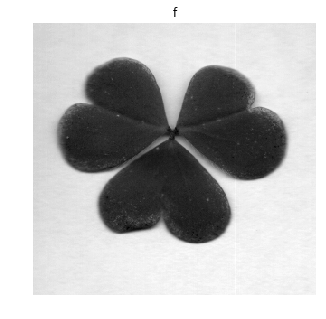

In [2]:
f_pil = Image.open('data/leaf.tif').convert('L')
f = np.array (f_pil)

(fig, axes) = plt.subplots(nrows=1, ncols=1,figsize=(10, 5))
axes.set_title('f')
axes.imshow(f, cmap='gray')
axes.axis('off')

# Simple thresholding

Although the leaf was pictured on a light background, it is not possible to fully segment the leaf using a simple thresholding

(0.0, 1.0, 0.0, 1.0)

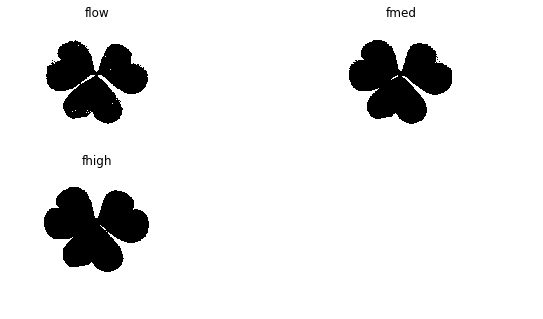

In [3]:
f_low=ia.iathreshad(f,100);
f_med=ia.iathreshad(f,128);
f_high=ia.iathreshad(f,160);

(fig, axes) = plt.subplots(nrows=2, ncols=2,figsize=(10, 5))
axes[0][0].set_title('flow')
axes[0][0].imshow(f_low, cmap='gray')
axes[0][0].axis('off')
axes[0][1].set_title('fmed')
axes[0][1].imshow(f_med, cmap='gray')
axes[0][1].axis('off')
axes[1][0].set_title('fhigh')
axes[1][0].imshow(f_high, cmap='gray')
axes[1][0].axis('off')
axes[1][1].axis('off')

## Toggle

The toggle is a non-linear image enhancement that changes the pixel value to the maximum or the minimum in the neighborhood given by the structure element, depending which one is the nearest value. The result of the toggle is that near the edges, the image is better defined. 

(-0.5, 312.5, 300.5, -0.5)

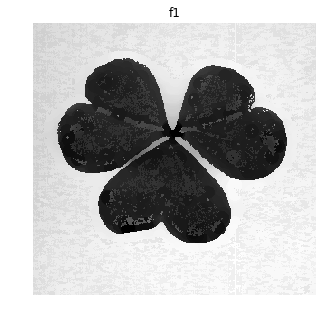

In [4]:
f1=ia.iatoggle(f,ia.iaero(f,ia.iasedisk(7)),ia.iadil(f,ia.iasedisk(7)))

(fig, axes) = plt.subplots(nrows=1, ncols=1,figsize=(10, 5))
axes.set_title('f1')
axes.imshow(f1, cmap='gray')
axes.axis('off')

## Thresholding and area open

The thresholding can now be applied resulting a good definition of the leaf boarder. Small white spots can be removed by the area open filter. 

(-0.5, 312.5, 300.5, -0.5)

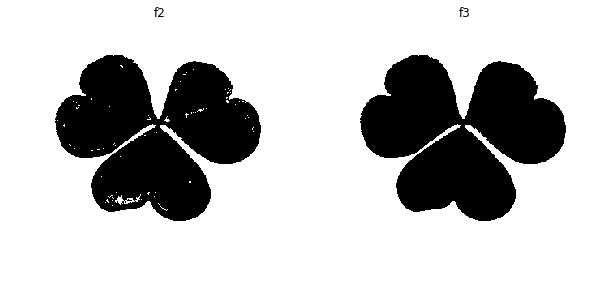

In [5]:
f2 = ia.iathreshad(f1,100)
f3=ia.iaareaopen(f2,80)

(fig, axes) = plt.subplots(nrows=1, ncols=2,figsize=(10, 5))
axes[0].set_title('f2')
axes[0].imshow(f2, cmap='gray')
axes[0].axis('off')
axes[1].set_title('f3')
axes[1].imshow(f3, cmap='gray')
axes[1].axis('off')

## Final display

For illustration, the contour of the segmented leaf is overlayed in red in the original image 

(-0.5, 312.5, 300.5, -0.5)

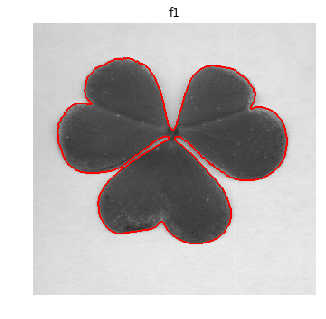

In [6]:
(fig, axes) = plt.subplots(nrows=1, ncols=1,figsize=(10, 5))
axes.set_title('f1')
axes.imshow(ia.iagshow(f, ia.iagradm(f3)).transpose(1, 2, 0))
axes.axis('off')